# Exploratory Data Analysis (EDA)
## Univariate Analysis

#### Load the dataset into the notebook.

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

# Add the 'src' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

# Configure logging
from logger import SetupLogger

# Import data visualizer tool
from utils import DataVisualizer

logger = SetupLogger(log_file='../logs/EDA.log').get_logger()

In [2]:
fraud_df = pd.read_csv('../data/raw/Fraud_Data.csv')

#### Numerical Features

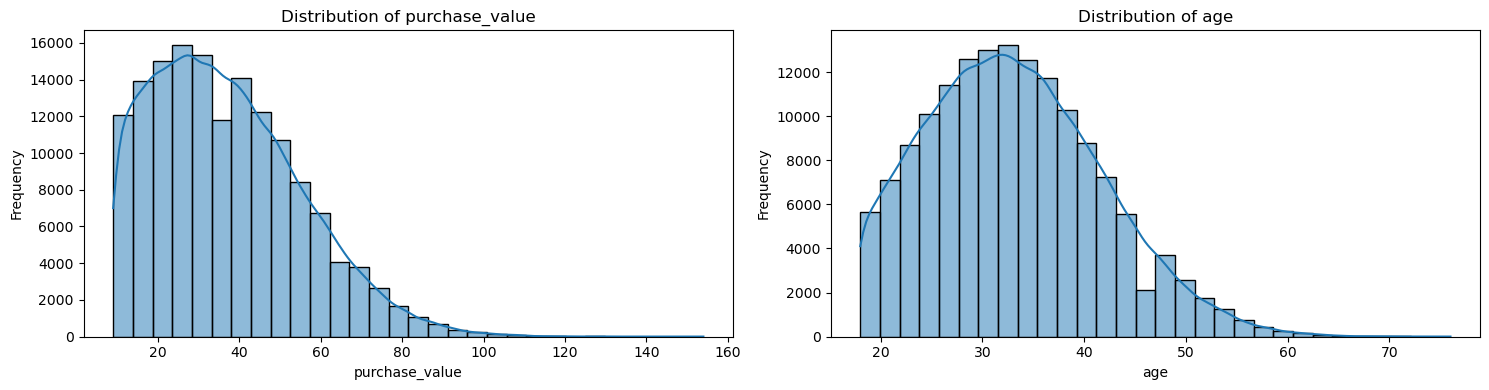

In [3]:
# Define numerical features
numerical_features = ['purchase_value', 'age']

# Define categorical features
categorical_features = ['source', 'browser', 'sex']

# Create instance of the DataVisualizer(df, target_col)
visualizer = DataVisualizer(fraud_df, numerical_features, categorical_features, 'class', logger)


visualizer._plot_histograms()

**Short Summary from the graph above:**
- `Purchase Value Distribution`: Right-skewed, with most values between 10 and 50.

- `Age Distribution`: Also right-skewed, with most individuals aged between 20 and 40.

- `Skewness`: Both distributions show a decline in frequency as values increase, indicating fewer high-value purchases and older individuals.

#### Distribution of categorical features

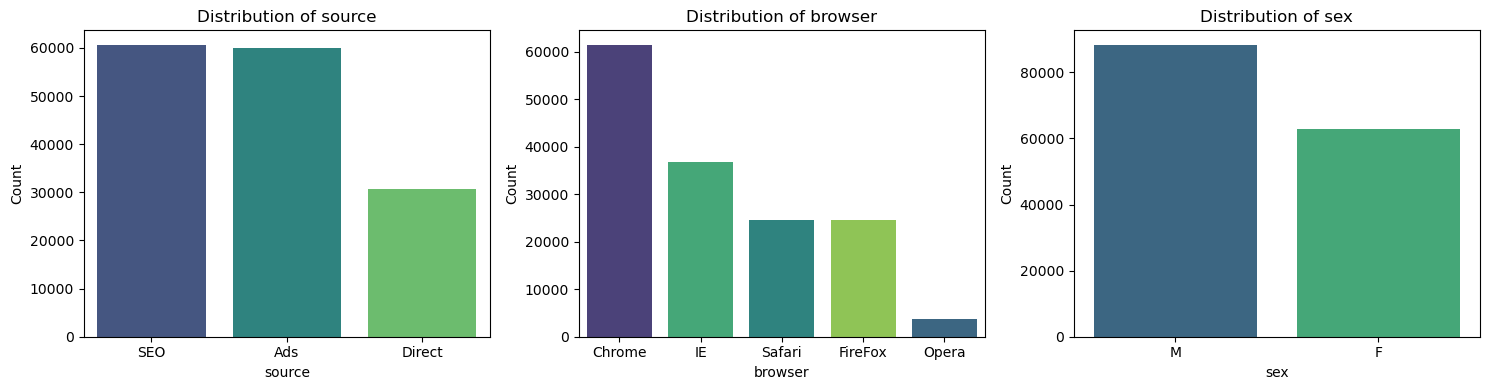

In [4]:
visualizer._plot_counts()

- Source Distribution: SEO and Ads sources are almost equally common, each around 60,000 counts, while Direct traffic is significantly lower.

- Browser Distribution: Chrome is the most used browser, followed by Internet Explorer (IE). Safari, Firefox, and Opera have lower usage.

- Sex Distribution: Males (M) are more frequent than females (F), with around 90,000 males compared to 70,000 females.

## Bivariate Analysis

#### Purchase Value vs Age

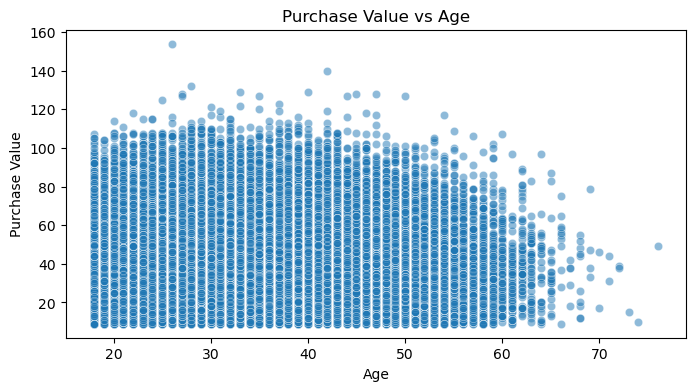

In [5]:
# Plot relationship between purchase_value vs age
visualizer.plot_relationship()

The scatter plot shows purchase value against age.

- **Pattern**: Purchase values are fairly consistent across ages 20 to 50, with values spread between 20 and 140.

- **Decline**: For ages above 50, purchase values gradually decrease, indicating fewer high-value purchases among older individuals.

#### Purchase Value by Sex

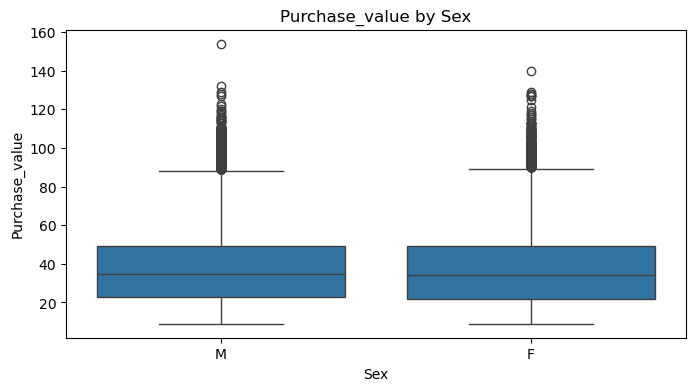

In [6]:
# Boxplot for purchase_value by sex
visualizer._boxplot('sex', 'purchase_value')

The box plot compares purchase values between two sexes: male (M) and female (F).

**Pattern**: The median purchase value is similar for both males and females. However, the distribution of purchase values differs:

**Males**: The distribution is slightly wider, with a few outliers indicating higher purchase values.

**Females**: The distribution is more concentrated around the median, with fewer outliers, suggesting a more consistent spending pattern.

##### The distribution of categorical features by Target variable(class)

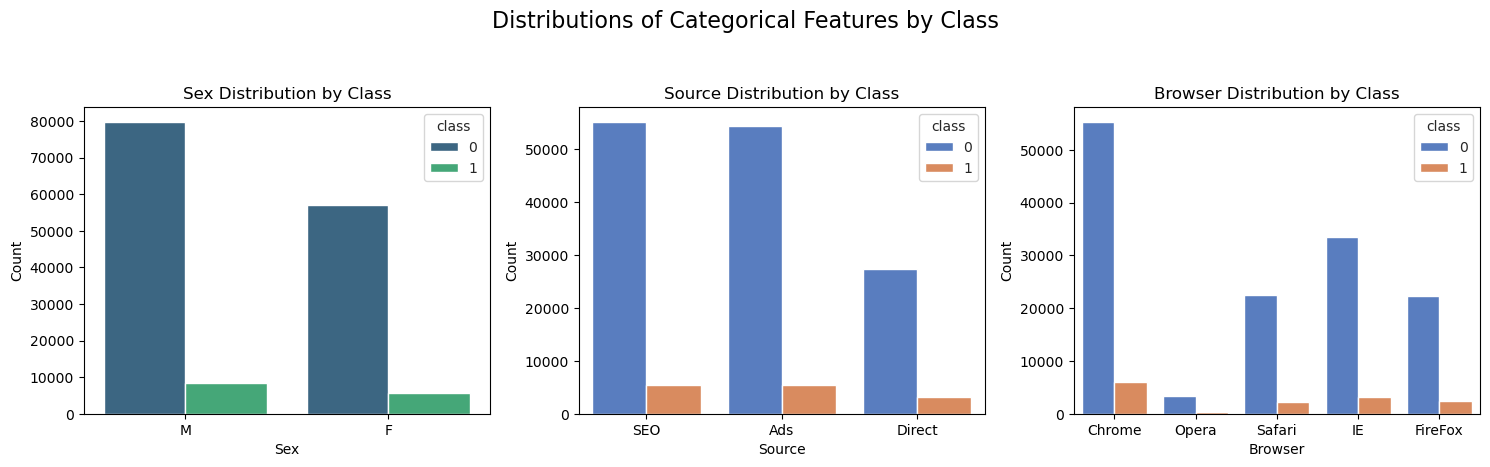

In [7]:
# plot the distribution of categorical feature variables by target variable
visualizer.plot_distribution_by_class()

The plots reveal differences in the distributions of categorical features (Sex, Source, Browser) between the two classes.

**Sex**: May be moderately informative; the distribution differences suggest it could aid in predicting the target variable.

**Source**: Likely less informative; high overlap in distributions indicates it may not be a strong predictor.

**Browser**: Could be a potentially informative feature; differences in usage suggest a relationship with class that might be explored further.

##### Browser usage and purchase value by target variable

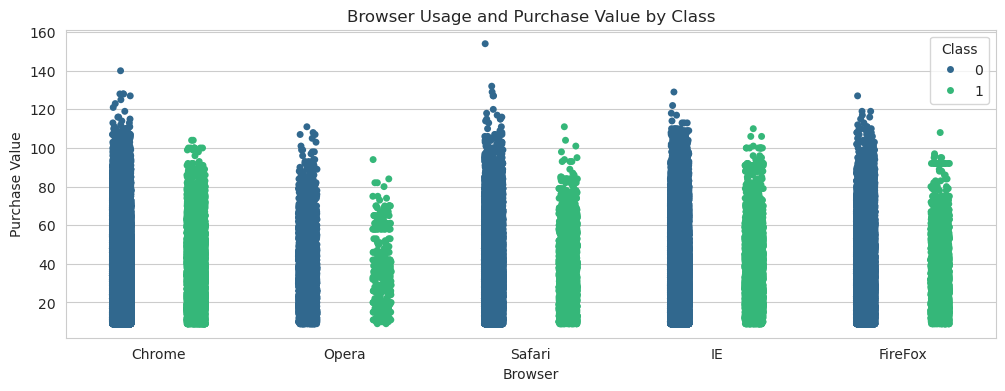

In [8]:
visualizer.plot_browser_usage()

Browser Overlap: Most browsers (Chrome, Opera, Safari, IE) show significant overlap in purchase values between non-fraud (class 0) and fraud (class 1) users, suggesting that browser usage is not a strong predictor of fraudulent behavior.

Distinct Separation: FireFox users demonstrate a clear separation, with non-fraud users (class 0) having consistently higher purchase values, indicating that FireFox might be a moderately informative feature for identifying fraud.

##### Source vs Browser

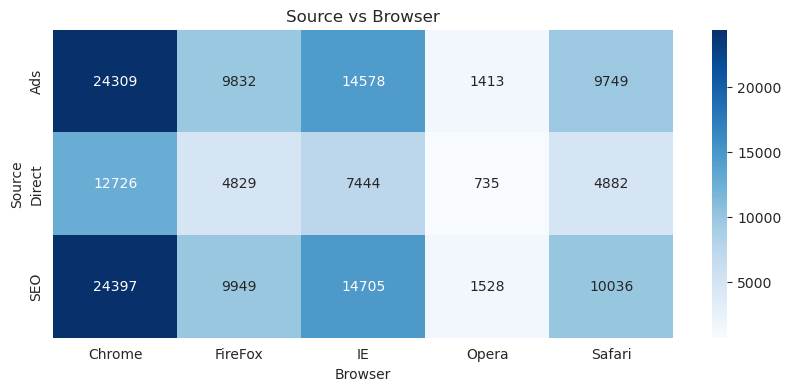

In [9]:
# Cross-tabulation and heatmap for source and browser
visualizer.plot_source_vs_browser_heatmap()

**Chrome** is the most popular browser across all sources.

**SEO** is the dominant traffic source for most browsers.

Ads and Direct traffic are more common for Chrome and IE, while Firefox, Opera, and Safari rely mainly on SEO.

#### User purchase analysis

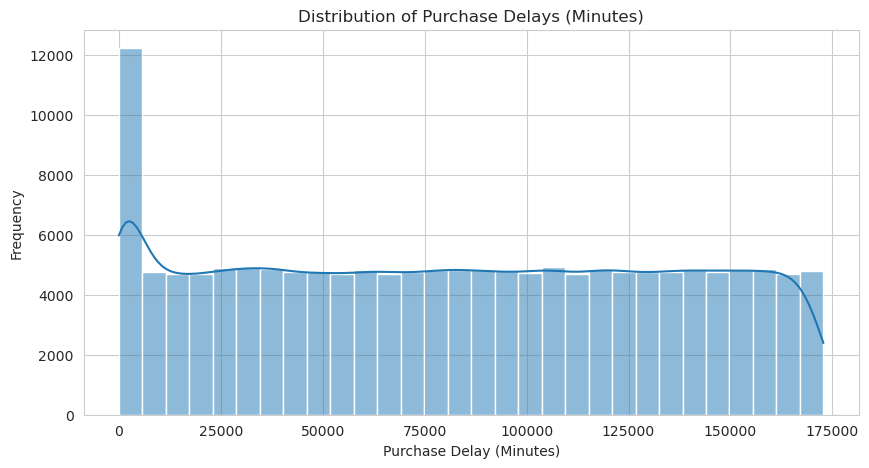

In [10]:
visualizer.plot_purchase_delay_distribution()

Most purchases are completed within a short timeframe, with delays predominantly under 25,000 minutes.

A notable number of purchases experience long delays, as indicated by the distribution's long tail.

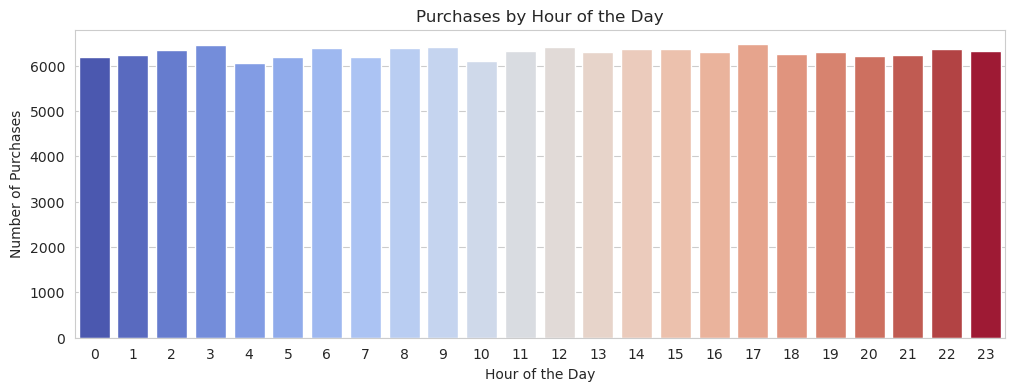

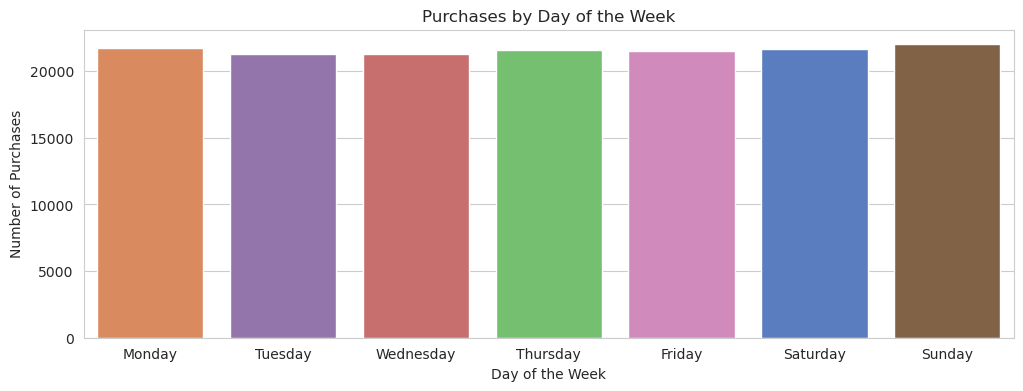

In [11]:
visualizer.plot_purchase_patterns_over_time()

The purchase counts are fairly consistent across all hours of the day, with no significant peaks or valleys, indicating steady activity throughout the day.

There are slight increases during some hours, but the differences are minimal, suggesting that customer purchasing behavior is relatively stable rather than exhibiting pronounced peak times.

Implication: This consistent pattern indicates that marketing strategies could be effectively spread throughout the day, rather than being concentrated at specific times.

The purchase volumes accross day of the weeks are relatively similar there is slightly higher purchase in Monday and Sunday may relate to weekend shopping or the start of the workweek.

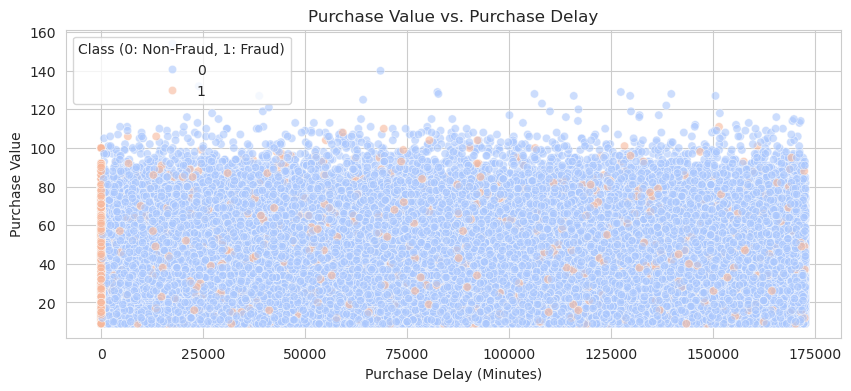

In [12]:
visualizer.plot_purchase_value_vs_delay()

Purchase value and purchase delay do not provide a reliable basis for predicting fraud.

Additional features, such as transaction history or customer information, are likely needed for accurate classification.

Outliers may indicate fraudulent activity; further investigation into these outliers could reveal patterns associated with fraud.

## Geolocation Analysis

#### Temporal Analysis of Fraudulent Transactions by Country

<Figure size 1400x700 with 0 Axes>

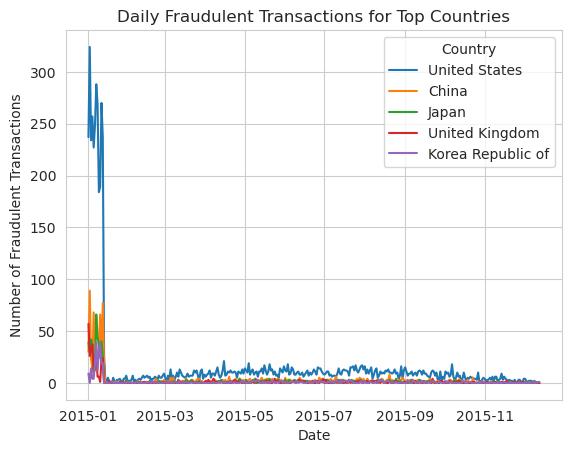

In [14]:
# Load the merged data from the 'data/processed' directory
merged_data = pd.read_csv('../data/processed/merged_fraud_data.csv')

# Convert 'purchase_time' to datetime format
merged_data['purchase_time'] = pd.to_datetime(merged_data['purchase_time'])

# Group fraudulent transactions by day and country
daily_fraud = merged_data[merged_data['class'] == 1].groupby([merged_data['purchase_time'].dt.date, 'country']).size().unstack().fillna(0)

# Determine the top countries with the highest number of fraudulent transactions
top_countries = daily_fraud.sum().nlargest(5).index

# Plotting fraud trends over time for the top countries
plt.figure(figsize=(14, 7))
daily_fraud[top_countries].plot()
plt.title('Daily Fraudulent Transactions for Top Countries')
plt.xlabel('Date')
plt.ylabel('Number of Fraudulent Transactions')
plt.legend(title='Country')
plt.show()

### Key Insights

`United States`: Had the highest number of fraudulent transactions initially, with a slight decrease over time.

`China`: Showed moderate fraudulent activity but experienced a significant decline.

`Japan, United Kingdom, and Korea`: Displayed lower fraudulent transaction volumes, respectively.